<a href="https://colab.research.google.com/github/Ramya-Katukojwala/CIIS-Hackathon-/blob/main/CIIS_HAckathon_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy
import pandas as pd
import time

# Twitter API credentials
bearer_token = "YOUR_BEARER_TOKEN"

client = tweepy.Client(bearer_token=bearer_token)

# Define smaller queries (each < 512 chars)
queries = [
    '"anti India" OR "boycott India" OR "India conflict" OR "AI India" OR "India spreading lies" OR "India is fake democracy"',
    '"India silences voices" OR "Shame on India" OR "India violates rights" OR "Expose India" OR "India is racist"',
    '"India is fascist" OR "India is terrorist state" OR "Jai Hind" OR "India is my pride" OR "Proud Indian"',
    '"Unity in diversity" OR "India is strong" OR "Bharat Mata ki Jai" OR "India is peace loving" OR "Incredible India"',
    '"Indian culture rich" OR "India is democratic" OR "Respect India"'
]

all_data = []

for query in queries:
    try:
        tweets = client.search_recent_tweets(
            query=query + " -is:retweet lang:en",
            tweet_fields=["author_id", "created_at", "text"],
            max_results=50
        )

        if tweets.data:
            for tweet in tweets.data:
                all_data.append({
                    "author_id": tweet.author_id,
                    "created_at": tweet.created_at,
                    "text": tweet.text
                })

        time.sleep(5)  # prevent hitting rate limit

    except tweepy.TooManyRequests:
        print("Rate limit reached. Waiting 15 minutes...")
        time.sleep(15 * 60)  # wait 15 min and retry
    except Exception as e:
        print(f"Error: {e}")

# Save to CSV
df = pd.DataFrame(all_data)
df.to_csv("tweets_data.csv", index=False)
print("✅ Data saved to tweets_data.csv")


In [ ]:
from transformers import pipeline

# Load the BART summarizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_text(paragraph, min_words=20, max_words=30):
    """
    Summarizes a given paragraph into 20-30 words using BART model.
    """
    summary = summarizer(
        paragraph,
        min_length=min_words,
        max_length=max_words,
        do_sample=False  # deterministic output
    )
    return summary[0]['summary_text']


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
import pandas as pd
from transformers import pipeline

# Load the BART summarizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

def summarize_text(paragraph, min_words=20, max_words=30):
    try:
        summary = summarizer(
            paragraph,
            min_length=min_words,
            max_length=max_words,
            do_sample=False
        )
        return summary[0]['summary_text']
    except Exception as e:
        print(f"Error summarizing: {e}")
        return paragraph  # fallback: return original text if error

# Load your CSV
df = pd.read_csv("/content/tweets.csv")   # replace with your actual file name

# Apply summarization only to the 'tweet_text' column
df["tweet_summary"] = df["tweet_text"].apply(lambda x: summarize_text(str(x)))

# Save to a new CSV
df.to_csv("tweets_with_summary.csv", index=False)

print("✅ Summarization complete. New CSV saved as tweets_with_summary.csv")


Device set to use cpu


✅ Summarization complete. New CSV saved as tweets_with_summary.csv


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.7 MB/s eta 0:00:00


Files found: ['/content/drive/MyDrive/Graph_Dataset/tweets/tweet_1.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_2.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_3.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_4.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_5.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_6.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_7.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_8.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_9.csv', '/content/drive/MyDrive/Graph_Dataset/tweets/tweet_10.csv']


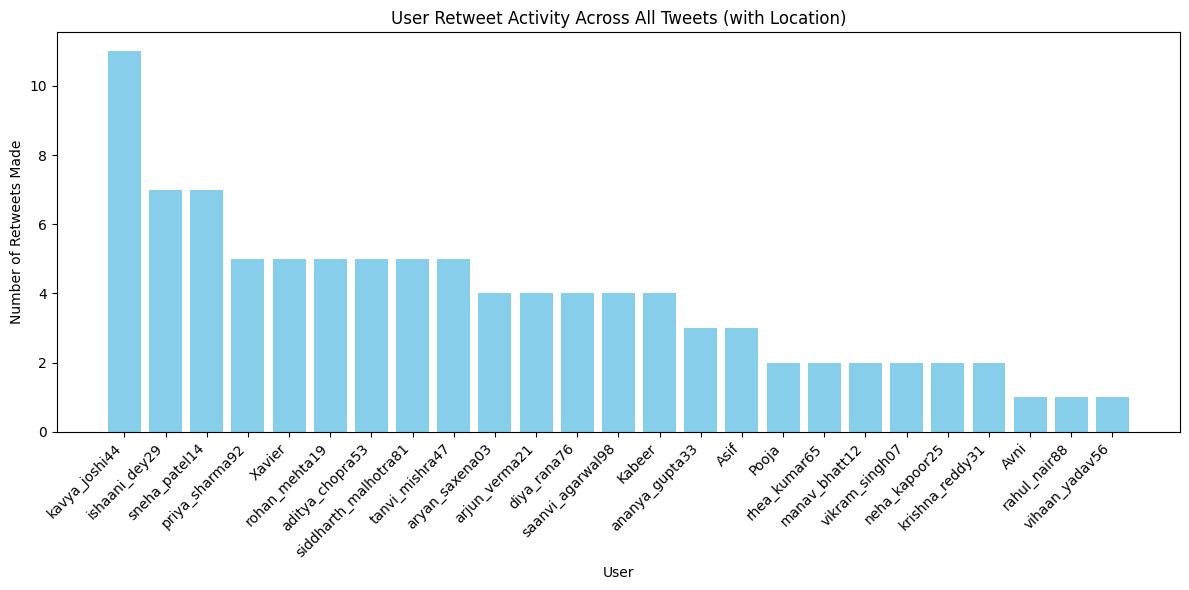

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ===== Step 1: Load the main tweets Excel file =====
main_file = "/content/drive/MyDrive/Graph_Dataset/Tweets with retweets.xlsx"
tweets_df = pd.read_excel(main_file)

# ===== Step 2: Collect all tweet CSV files =====
csv_folder = "/content/drive/MyDrive/Graph_Dataset/tweets"
all_files = glob.glob(os.path.join(csv_folder, "tweet_*.csv"))

print("Files found:", all_files)  # 👈 Debug: check if files are detected

# List to store repost data
repost_data = []

# ===== Step 3: Read each CSV and add tweet_id =====
for file in all_files:
    tweet_id = os.path.splitext(os.path.basename(file))[0]  # e.g., "tweet_1"

    df = pd.read_csv(file)

    # Ensure expected columns exist
    if "account_id" in df.columns and "name" in df.columns:
        df["tweet_id"] = tweet_id
        if "location" not in df.columns:   # if missing, fill as Unknown
            df["location"] = "Unknown"
        repost_data.append(df)

# ===== Step 4: Combine all repost data =====
if repost_data:  # only combine if not empty
    reposts_df = pd.concat(repost_data, ignore_index=True)
else:
    raise ValueError("No tweet CSV files found in the folder. Please check filenames!")

# ===== Step 5: Count number of retweets per user =====
user_retweet_counts = (
    reposts_df.groupby(["account_id", "name", "location"])
    .size()
    .reset_index(name="retweet_count")
)

# ===== Step 6: Sort for plotting =====
user_retweet_counts = user_retweet_counts.sort_values(by="retweet_count", ascending=False)

# ===== Step 7: Plot bar chart =====
plt.figure(figsize=(12,6))
plt.bar(user_retweet_counts["name"], user_retweet_counts["retweet_count"], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.xlabel("User")
plt.ylabel("Number of Retweets Made")
plt.title("User Retweet Activity Across All Tweets (with Location)")
plt.tight_layout()
plt.show()


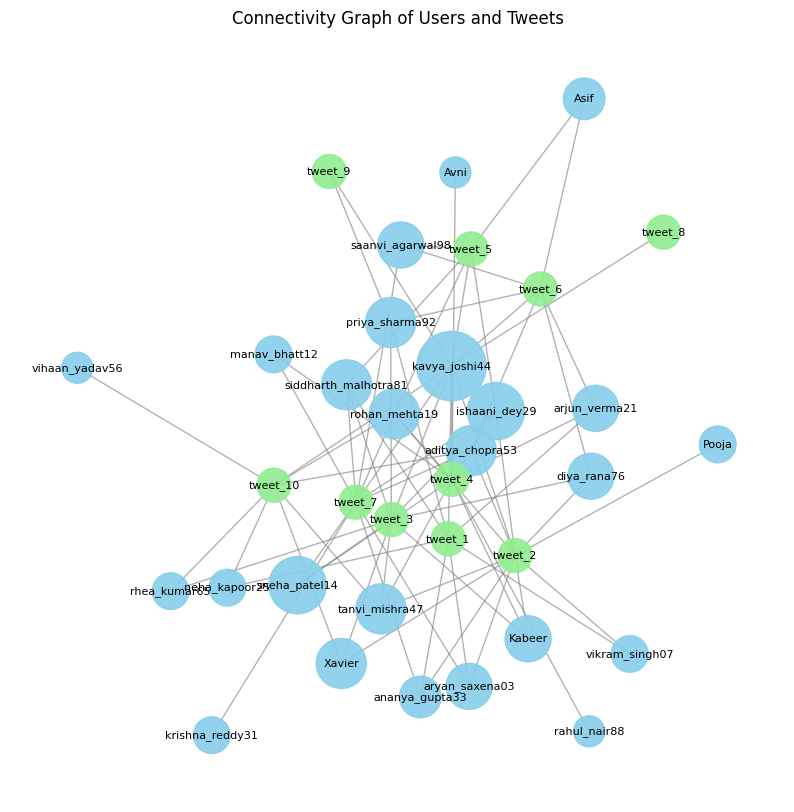

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import glob
import os

# ===== Step 1: Load the main tweets Excel file =====
main_file = "/content/drive/MyDrive/Graph_Dataset/Tweets with retweets.xlsx"
tweets_df = pd.read_excel(main_file)

# ===== Step 2: Collect all tweet CSV files =====
csv_folder = "/content/drive/MyDrive/Graph_Dataset/tweets"
all_files = glob.glob(os.path.join(csv_folder, "tweet_*.csv"))

# ===== Step 3: Build graph data =====
G = nx.Graph()
user_counts = {}

for file in all_files:
    tweet_id = os.path.splitext(os.path.basename(file))[0]  # e.g. tweet_1
    df = pd.read_csv(file)

    # Guess columns (fix if your CSV uses different names)
    if "account_id" in df.columns and "name" in df.columns:
        for _, row in df.iterrows():
            user = row["name"]
            G.add_node(user, type="user")
            G.add_node(tweet_id, type="tweet")

            # Add edge: user -> tweet
            G.add_edge(user, tweet_id)

            # Count retweets per user
            user_counts[user] = user_counts.get(user, 0) + 1

# ===== Step 4: Draw the graph =====
plt.figure(figsize=(10,10))

# Position nodes
pos = nx.spring_layout(G, k=0.5, seed=42)

# Node sizes (users bigger if more retweets)
sizes = []
colors = []
for node in G.nodes():
    if G.nodes[node]["type"] == "user":
        sizes.append(300 + user_counts.get(node, 1) * 200)  # scale user size
        colors.append("skyblue")
    else:
        sizes.append(600)  # tweets fixed size
        colors.append("lightgreen")

nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Connectivity Graph of Users and Tweets")
plt.axis("off")
plt.show()


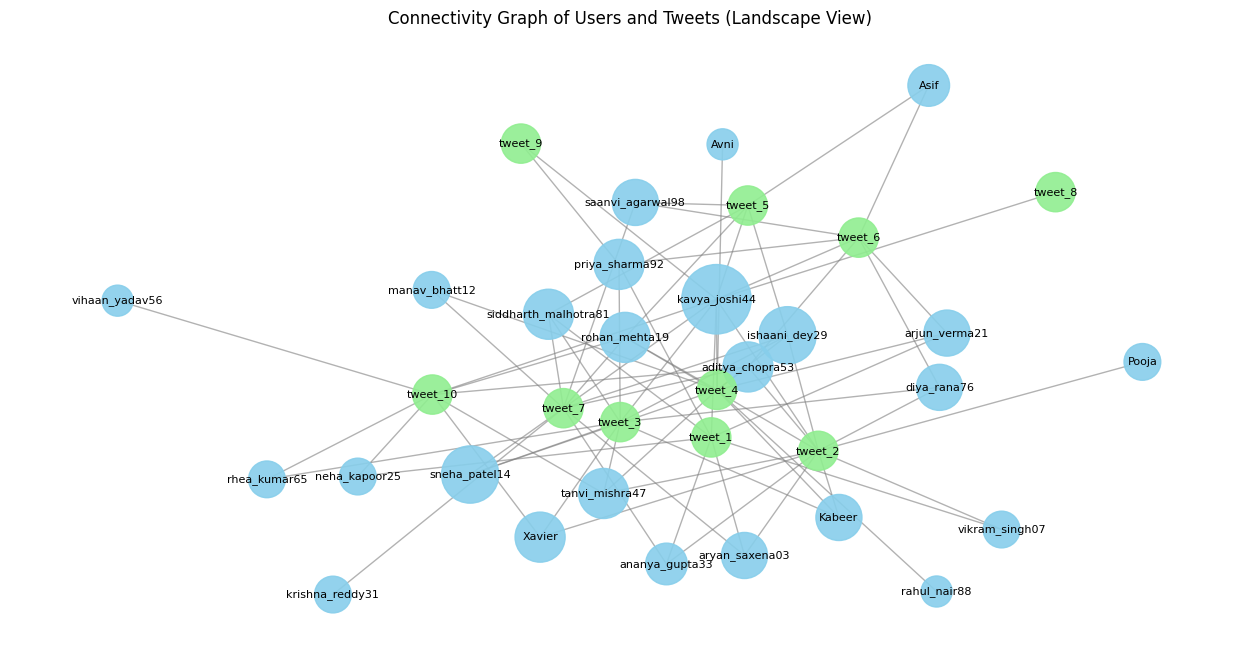

In [ ]:
# ===== Step 4: Draw the graph in landscape mode =====
plt.figure(figsize=(16,8))  # 👈 landscape (width=16, height=8)

# Position nodes
pos = nx.spring_layout(G, k=0.5, seed=42)

# Node sizes (users bigger if more retweets)
sizes = []
colors = []
for node in G.nodes():
    if G.nodes[node]["type"] == "user":
        sizes.append(300 + user_counts.get(node, 1) * 200)  # scale user size
        colors.append("skyblue")
    else:
        sizes.append(800)  # tweets fixed size
        colors.append("lightgreen")

nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Connectivity Graph of Users and Tweets (Landscape View)")
plt.axis("off")
plt.show()
